In [3]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
dataset_path = "/content/drive/MyDrive/5Animals"

In [6]:
#Augmentation  --> im
img_data_generator = ImageDataGenerator(

    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.3,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=1./255,           #normalization - divide each pixels into 255
    validation_split=0.2,
)


train_dataset = img_data_generator.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset="training",
    target_size=(224,224)
)

validation_dataset = img_data_generator.flow_from_directory(
    dataset_path,
    shuffle=True,
    subset="validation",
    target_size=(224,224)
)

Found 1042 images belonging to 5 classes.
Found 257 images belonging to 5 classes.


In [7]:
model = tf.keras.models.Sequential([

    #Feature Extraction
    tf.keras.layers.Conv2D( filters=32 , kernel_size=(3,3) , strides=(2,2) , activation="relu", padding="same" , input_shape=(224,224,3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D( filters=64 , kernel_size=(3,3) , strides=(1,1) , activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D( filters=128 , kernel_size=(3,3) , strides=(1,1) , activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D( filters=256 , kernel_size=(3,3) , strides=(1,1) , activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(),

    # Feature Array
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512 , activation="relu"),
    tf.keras.layers.Dense(5    , activation="softmax")
    ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=["accuracy"])


In [9]:
history = model.fit(train_dataset,
                    validation_data=validation_dataset,
                    epochs=50)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 875s 21s/step - accuracy: 0.2113 - loss: 1.7164 - val_accuracy: 0.3541 - val_loss: 1.4917
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 36s 900ms/step - accuracy: 0.3625 - loss: 1.4759 - val_accuracy: 0.3424 - val_loss: 1.3731
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 31s 795ms/step - accuracy: 0.4012 - loss: 1.3602 - val_accuracy: 0.4358 - val_loss: 1.3161
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 31s 778ms/step - accuracy: 0.4238 - loss: 1.2941 - val_accuracy: 0.4436 - val_loss: 1.3532
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 40s 759ms/step - accuracy: 0.4690 - loss: 1.2607 - val_accuracy: 0.4903 - val_loss: 1.1909
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 32s 770ms/step - accuracy: 0.4862 - loss: 1.1720 - val_accuracy: 0.4786 - val_loss: 1.2120
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 31s 817ms/step - accuracy: 0.5113 - loss: 1.1906 - val_accuracy: 0.4981 - val_loss: 1.1897
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 42s 815ms/step - accuracy: 0.5393 - loss: 1.1033 - val_accuracy: 0.5331

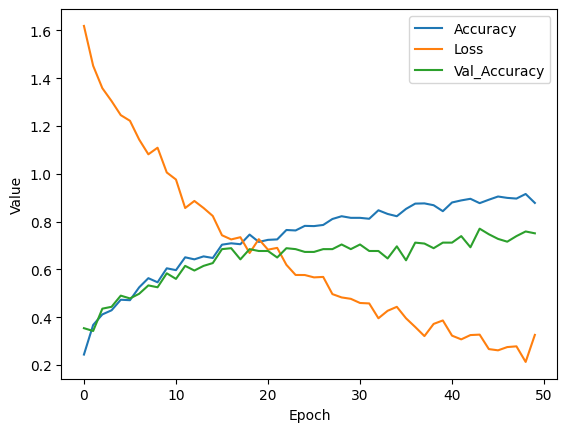

In [10]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.plot(history.history["val_accuracy"])
plt.legend(["Accuracy","Loss" , "Val_Accuracy" ])
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.show()

In [11]:
model.save("5animals_weights.h5")
model.save("5animals_weights.keras")


In [12]:
loss , accuracy = model.evaluate(validation_dataset)
loss , accuracy

9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 611ms/step - accuracy: 0.7107 - loss: 0.8852


(0.9678127765655518, 0.7003890872001648)

In [13]:
y_pred = model.predict(validation_dataset)

9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 634ms/step


In [14]:
y_pred.shape

(257, 5)

In [15]:
y_pred_list = []
for i in range(128) :
    y_pred_list.append(np.argmax(y_pred[i]))
np.array(y_pred_list)

array([4, 3, 0, 0, 4, 4, 1, 2, 4, 3, 1, 1, 1, 2, 4, 0, 0, 2, 2, 4, 4, 2,
       4, 3, 3, 1, 1, 2, 2, 1, 2, 2, 1, 2, 4, 1, 2, 3, 2, 1, 4, 4, 0, 2,
       3, 0, 2, 3, 3, 1, 1, 1, 4, 0, 0, 1, 4, 1, 2, 4, 3, 3, 0, 2, 0, 4,
       1, 4, 3, 3, 1, 4, 1, 1, 2, 1, 0, 1, 4, 3, 4, 0, 3, 0, 3, 3, 3, 3,
       1, 3, 1, 3, 0, 1, 4, 1, 0, 3, 3, 1, 3, 3, 1, 4, 4, 0, 1, 1, 0, 3,
       4, 0, 0, 1, 1, 0, 1, 0, 1, 0, 3, 4, 4, 3, 2, 2, 1, 0])

In [16]:
validation_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [18]:
validation_dataset

In [19]:
validation_dataset[0]

(array([[[[0.65882355, 0.48235297, 0.28627452],
          [0.65882355, 0.48235297, 0.28627452],
          [0.65882355, 0.48235297, 0.28627452],
          ...,
          [0.7318688 , 0.40245706, 0.24916485],
          [0.7332853 , 0.3806323 , 0.24318531],
          [0.7479999 , 0.39139205, 0.23947065]],
 
         [[0.65882355, 0.48235297, 0.28627452],
          [0.65882355, 0.48235297, 0.28627452],
          [0.65882355, 0.48235297, 0.28627452],
          ...,
          [0.72943187, 0.40002006, 0.247076  ],
          [0.7345338 , 0.38129252, 0.24283716],
          [0.7466073 , 0.39034763, 0.23981878]],
 
         [[0.65882355, 0.48235297, 0.28627452],
          [0.65882355, 0.48235297, 0.28627452],
          [0.65882355, 0.48235297, 0.28627452],
          ...,
          [0.7297571 , 0.39827365, 0.24671355],
          [0.73592633, 0.3823369 , 0.24248902],
          [0.74521476, 0.38930324, 0.24016692]],
 
         ...,
 
         [[0.722957  , 0.5517078 , 0.33476597],
          [0.72690

In [20]:
validation_dataset[1]

(array([[[[0.39453316, 0.5121802 , 0.54355276],
          [0.40187886, 0.5224261 , 0.53639746],
          [0.40922457, 0.5334447 , 0.53333336],
          ...,
          [0.76470596, 0.8470589 , 0.95294124],
          [0.76470596, 0.8470589 , 0.95294124],
          [0.76470596, 0.8470589 , 0.95294124]],
 
         [[0.39428222, 0.5119293 , 0.5433018 ],
          [0.40162793, 0.5220498 , 0.53677386],
          [0.40897366, 0.5330683 , 0.53333336],
          ...,
          [0.76470596, 0.8470589 , 0.95294124],
          [0.76470596, 0.8470589 , 0.95294124],
          [0.76470596, 0.8470589 , 0.95294124]],
 
         [[0.3940313 , 0.5116784 , 0.54305094],
          [0.40137702, 0.5216734 , 0.5371502 ],
          [0.40872273, 0.5326919 , 0.53333336],
          ...,
          [0.76470596, 0.8470589 , 0.95294124],
          [0.76470596, 0.8470589 , 0.95294124],
          [0.76470596, 0.8470589 , 0.95294124]],
 
         ...,
 
         [[0.8055704 , 0.54993594, 0.36715364],
          [0.78471

In [21]:
validation_dataset.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [22]:
y_pred_list = []
for i in range(128) :
    y_pred_list.append(np.argmax(y_pred[i]))

images,labels = validation_dataset[0]
ypred_list = []
for image in images:
    image = np.expand_dims(image, axis=0)
    ypred=model.predict(image)
    ypred_list.append(np.argmax(ypred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━

In [23]:
ytrue_list = []
for label in labels:
    ytrue_list.append(np.argmax(label))
np.array(ytrue_list)

array([0, 4, 4, 1, 4, 1, 0, 0, 0, 2, 3, 1, 3, 0, 2, 0, 0, 4, 0, 2, 0, 0,
       2, 0, 4, 2, 0, 1, 1, 2, 0, 3])

In [24]:
np.array(ypred_list)

array([3, 4, 4, 1, 4, 2, 0, 0, 0, 2, 3, 0, 3, 1, 2, 0, 0, 4, 0, 3, 0, 1,
       2, 1, 4, 2, 1, 3, 3, 2, 3, 1])

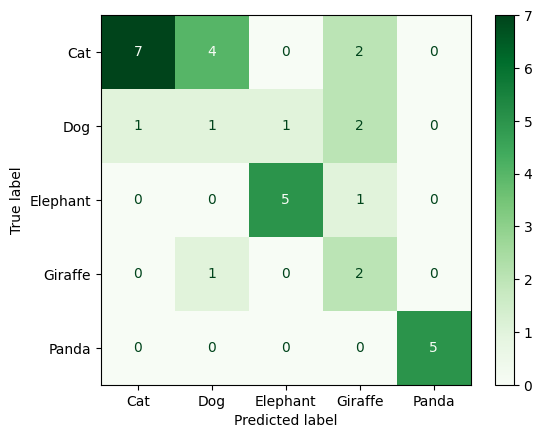

In [30]:
confm = confusion_matrix(y_true= ytrue_list , y_pred= ypred_list )
conf = ConfusionMatrixDisplay(confusion_matrix = confm, display_labels = ['Cat','Dog' , 'Elephant', 'Giraffe', 'Panda'] )
conf.plot(cmap=plt.cm.Greens)
plt.show()

## Inference

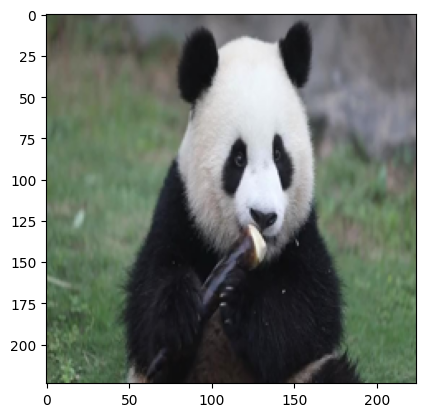

In [35]:
from PIL import Image

image = Image.open("/content/Panda.jpg")
new_image = image.resize((224,224))
new_image.save("/content/image.jpg")
plt.imshow(new_image)

In [36]:
new_image = cv2.imread("/content/image.jpg" , 0)
new_image = cv2.cvtColor(new_image , cv2.COLOR_BGR2RGB)
print(new_image.shape)
img = np.reshape(new_image, [1, 224, 224, 3])
output = model.predict(img)
predicted_class = np.argmax(output)

print(output)
print(predicted_class)
print(train_dataset.class_indices)
if predicted_class == 0:
    print("😸🐈")
elif predicted_class == 1:
    print("🐕‍🦺🐕")
elif predicted_class == 2:
    print("🐘")
elif predicted_class == 3:
    print("🦒")
elif predicted_class == 4:
    print("🐼")

(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[[0. 0. 0. 0. 1.]]
4
{'cat': 0, 'dog': 1, 'elephant': 2, 'giraffe': 3, 'panda': 4}
🐼
